# Exploratory data analysis

## 1. Load the data:

Click [here](https://ec.europa.eu/eurostat/databrowser/view/EXT_LT_INTROEU27_2020__custom_7204108/default/table?lang=en) for more information upon the dataset.

In [1]:
import urllib.request
url = 'https://ec.europa.eu/eurostat/api/dissemination/sdmx/3.0/data/dataflow/ESTAT/EXT_LT_INTROEU27_2020/1.0/A.*.*.*?c[indic_et]=MIO_EXP_VAL,MIO_IMP_VAL&c[sitc06]=TOTAL,SITC0_1,SITC2_4,SITC3,SITC5,SITC6_8,SITC7,SITC9&c[geo]=EU27_2020,UK,RU,CA,US,MX,BR,CN_X_HK,JP,KR,IN,SG&compress=false&format=csvdata&formatVersion=2.0&c[TIME_PERIOD]=ge:2013+le:2022&lang=en&labels=name&returnLastUpdateDate=true'
filename = "EU27's Import and Export data 2013-2022.csv"

urllib.request.urlretrieve(url, filename)

("EU27's Import and Export data 2013-2022.csv",
 <http.client.HTTPMessage at 0x21755b73400>)

In [2]:
import pandas as pd

df = pd.read_csv(filename ) #assign the header to the table
df.head()
        

,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,freq,Time frequency,indic_et,External trade indicator,sitc06,"Standard International Trade Classification (SITC Rev. 4, 2006)",geo,Geopolitical entity (reporting),TIME_PERIOD,Time,OBS_VALUE,Observation value,OBS_FLAG,Observation status (Flag),LAST UPDATE
0,dataflow,ESTAT:EXT_LT_INTROEU27_2020(1.0),Share of European Union EU27 (from 2020) in th...,A,Annual,MIO_EXP_VAL,Exports in million of ECU/EURO,SITC0_1,"Food, drinks and tobacco",BR,Brazil,2013,NaN,43195.3,NaN,NaN,NaN,17/08/23 11:00:00
1,dataflow,ESTAT:EXT_LT_INTROEU27_2020(1.0),Share of European Union EU27 (from 2020) in th...,A,Annual,MIO_EXP_VAL,Exports in million of ECU/EURO,SITC0_1,"Food, drinks and tobacco",BR,Brazil,2014,NaN,40564.5,NaN,NaN,NaN,17/08/23 11:00:00
2,dataflow,ESTAT:EXT_LT_INTROEU27_2020(1.0),Share of European Union EU27 (from 2020) in th...,A,Annual,MIO_EXP_VAL,Exports in million of ECU/EURO,SITC0_1,"Food, drinks and tobacco",BR,Brazil,2015,NaN,43476.4,NaN,NaN,NaN,17/08/23 11:00:00
3,dataflow,ESTAT:EXT_LT_INTROEU27_2020(1.0),Share of European Union EU27 (from 2020) in th...,A,Annual,MIO_EXP_VAL,Exports in million of ECU/EURO,SITC0_1,"Food, drinks and tobacco",BR,Brazil,2016,NaN,42728.0,NaN,NaN,NaN,17/08/23 11:00:00
4,dataflow,ESTAT:EXT_LT_INTROEU27_2020(1.0),Share of European Union EU27 (from 2020) in th...,A,Annual,MIO_EXP_VAL,Exports in million of ECU/EURO,SITC0_1,"Food, drinks and tobacco",BR,Brazil,2017,NaN,44527.1,NaN,NaN,NaN,17/08/23 11:00:00


## 2. Have an overview of the data:
- Take a look at the data in the spreadsheet format.
- `Notice`: 
    - The pattern of the data
    - Unnecessary data range
    - Data types
    - Missing values are represented as? Number of missing values for each column?


> Missing values are represented as empty strings '', hence:
```python
pd.options.mode.use_inf_as_na = True #set the empty string as NaN values
```

In [3]:
pd.options.mode.use_inf_as_na = True #set the empty strings as NaN values

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Data columns (total 18 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   STRUCTURE                                                        1904 non-null   object 
 1   STRUCTURE_ID                                                     1904 non-null   object 
 2   STRUCTURE_NAME                                                   1904 non-null   object 
 3   freq                                                             1904 non-null   object 
 4   Time frequency                                                   1904 non-null   object 
 5   indic_et                                                         1904 non-null   object 
 6   External trade indicator                                         1904 non-null   object 
 7   sitc06                                    

## 2. Data processing:

> `DEAL WITH MISSING VALUES`:
- Since there are only columns or mere null values and columns of mere non-null values. Hence, we only need to drop columns of mere non-null values withour any further processes. However, in cases where there are columns consisting of both null and non-null values, we should:
```python
# 1. replace missing values with np.NaN if necessary:
import numpy as np
df.replace(missing_values, np.nan)

#2. analyze number of missing values for each column:
for col in df.isnull().to_frame():
    print(col)
    print(df.isnull().to_frame()[col])
    print('')
```
- Based on the proportion of missing values within the column, we can either:
    - Drop rows/columns:
```python
df.dropna(subset = ['col'], #list of columns to drop
          axis = 0, #to drop rows or 1 to drop columns
          inplace = True)
```
    - Replace missing values with:
        - mean
        - mode
        - chosen values based on experience of the analyzers
```python
df.fillna(value = value_to_replace, 
         inplace = True)
```
        


> `DROP UNNECESSARY COLUMNS:`

In [5]:
df.head()

,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,freq,Time frequency,indic_et,External trade indicator,sitc06,"Standard International Trade Classification (SITC Rev. 4, 2006)",geo,Geopolitical entity (reporting),TIME_PERIOD,Time,OBS_VALUE,Observation value,OBS_FLAG,Observation status (Flag),LAST UPDATE
0,dataflow,ESTAT:EXT_LT_INTROEU27_2020(1.0),Share of European Union EU27 (from 2020) in th...,A,Annual,MIO_EXP_VAL,Exports in million of ECU/EURO,SITC0_1,"Food, drinks and tobacco",BR,Brazil,2013,NaN,43195.3,NaN,NaN,NaN,17/08/23 11:00:00
1,dataflow,ESTAT:EXT_LT_INTROEU27_2020(1.0),Share of European Union EU27 (from 2020) in th...,A,Annual,MIO_EXP_VAL,Exports in million of ECU/EURO,SITC0_1,"Food, drinks and tobacco",BR,Brazil,2014,NaN,40564.5,NaN,NaN,NaN,17/08/23 11:00:00
2,dataflow,ESTAT:EXT_LT_INTROEU27_2020(1.0),Share of European Union EU27 (from 2020) in th...,A,Annual,MIO_EXP_VAL,Exports in million of ECU/EURO,SITC0_1,"Food, drinks and tobacco",BR,Brazil,2015,NaN,43476.4,NaN,NaN,NaN,17/08/23 11:00:00
3,dataflow,ESTAT:EXT_LT_INTROEU27_2020(1.0),Share of European Union EU27 (from 2020) in th...,A,Annual,MIO_EXP_VAL,Exports in million of ECU/EURO,SITC0_1,"Food, drinks and tobacco",BR,Brazil,2016,NaN,42728.0,NaN,NaN,NaN,17/08/23 11:00:00
4,dataflow,ESTAT:EXT_LT_INTROEU27_2020(1.0),Share of European Union EU27 (from 2020) in th...,A,Annual,MIO_EXP_VAL,Exports in million of ECU/EURO,SITC0_1,"Food, drinks and tobacco",BR,Brazil,2017,NaN,44527.1,NaN,NaN,NaN,17/08/23 11:00:00


In [6]:
#drop columns
df.drop(columns = ['STRUCTURE', 'STRUCTURE_ID', 'freq', 'indic_et', 'sitc06', 'geo', 'Time', 'Observation value', 'OBS_FLAG',\
                  'Observation status (Flag)', 'LAST UPDATE'],
        inplace = True) #make the modification to the origninal df
df.head()

,STRUCTURE_NAME,Time frequency,External trade indicator,"Standard International Trade Classification (SITC Rev. 4, 2006)",Geopolitical entity (reporting),TIME_PERIOD,OBS_VALUE
0,Share of European Union EU27 (from 2020) in th...,Annual,Exports in million of ECU/EURO,"Food, drinks and tobacco",Brazil,2013,43195.3
1,Share of European Union EU27 (from 2020) in th...,Annual,Exports in million of ECU/EURO,"Food, drinks and tobacco",Brazil,2014,40564.5
2,Share of European Union EU27 (from 2020) in th...,Annual,Exports in million of ECU/EURO,"Food, drinks and tobacco",Brazil,2015,43476.4
3,Share of European Union EU27 (from 2020) in th...,Annual,Exports in million of ECU/EURO,"Food, drinks and tobacco",Brazil,2016,42728.0
4,Share of European Union EU27 (from 2020) in th...,Annual,Exports in million of ECU/EURO,"Food, drinks and tobacco",Brazil,2017,44527.1


>`CATEGORIZE DATA BASED ON DATA_TYPES`:

In [7]:
#import numpy to use np.number:
import numpy as np

#list of quantitative data:
quanti = df.select_dtypes(include = np.number).columns.to_list()
quanti

['TIME_PERIOD', 'OBS_VALUE']

In [8]:
#list of qualitative data:
quali = df.select_dtypes(include = np.object).columns.to_list()
quali

C:\Users\Admin\AppData\Local\Temp\ipykernel_6756\2602149367.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  quali = df.select_dtypes(include = np.object).columns.to_list()


['STRUCTURE_NAME',
 'Time frequency',
 'External trade indicator',
 'Standard International Trade Classification (SITC Rev. 4, 2006)',
 'Geopolitical entity (reporting)']

> `CAST DATA TYPES if necessary`:
- Cast year into object:

In [9]:
df['TIME_PERIOD'] = df['TIME_PERIOD'].astype('string')
df.dtypes

STRUCTURE_NAME                                                             object
Time frequency                                                             object
External trade indicator                                                   object
Standard International Trade Classification (SITC Rev. 4, 2006)            object
Geopolitical entity (reporting)                                            object
TIME_PERIOD                                                        string[python]
OBS_VALUE                                                                 float64
dtype: object

In [10]:
#restructure quanti list:
quanti = ['OBS_VALUE']
quanti

['OBS_VALUE']

### 3. Exploratory data analysis:
- QUANTITATIVE DATA:
    - Measure of location:
        - Mean
        - Median
        - Mode
        - Interquartile range
    - Measure of variation:
        - Range
        - Std
- QUALITATIVE DATA:
    - Number of frequency for each categorical classes
- Correlation:
    - Quanti vs quanti
    - Quanti vs Quali
    - Quali vs Quali

> `QUANTITATIVE DATA`:

In [11]:
df.describe()

,OBS_VALUE
count,1.904000e+03
mean,1.940219e+05
std,3.739590e+05
min,2.800000e+00
25%,2.519917e+04
50%,5.938370e+04
75%,1.835112e+05
max,3.412727e+06


- Observation values:
    - Since the values of OBS_VALUE are represented as e+ number. To read it, we will cast the values of OBS_VALUE into `object`.

In [12]:
OBS = df.describe()['OBS_VALUE'].astype('object')

for index in OBS.index: #OBS has the type of df series
    print(f'The {index} of the observation values is {OBS[index]}')

The count of the observation values is 1904.0
The mean of the observation values is 194021.90420168068
The std of the observation values is 373958.9610653223
The min of the observation values is 2.8
The 25% of the observation values is 25199.175
The 50% of the observation values is 59383.7
The 75% of the observation values is 183511.225
The max of the observation values is 3412726.9


> `QUALITATIVE DATA`

In [13]:
df.describe(include = ['object','string'])

,STRUCTURE_NAME,Time frequency,External trade indicator,"Standard International Trade Classification (SITC Rev. 4, 2006)",Geopolitical entity (reporting),TIME_PERIOD
count,1904,1904,1904,1904,1904,1904
unique,1,1,2,8,12,10
top,Share of European Union EU27 (from 2020) in th...,Annual,Exports in million of ECU/EURO,"Food, drinks and tobacco",Brazil,2013
freq,1904,1904,952,238,160,192


- The number of unique values within STRUCTURE_NAME and Time frequency is 1. Hence, we can drop these columns since they yield little information. 

In [14]:
#drop columns:
df.drop(columns = ['STRUCTURE_NAME', 'Time frequency'], axis = 1,
        inplace = True)

#list of qualitative variables:
quali = ['External trade indicator',
 'Standard International Trade Classification (SITC Rev. 4, 2006)',
 'Geopolitical entity (reporting)', 'TIME_PERIOD']

df[quali].head()

,External trade indicator,"Standard International Trade Classification (SITC Rev. 4, 2006)",Geopolitical entity (reporting),TIME_PERIOD
0,Exports in million of ECU/EURO,"Food, drinks and tobacco",Brazil,2013
1,Exports in million of ECU/EURO,"Food, drinks and tobacco",Brazil,2014
2,Exports in million of ECU/EURO,"Food, drinks and tobacco",Brazil,2015
3,Exports in million of ECU/EURO,"Food, drinks and tobacco",Brazil,2016
4,Exports in million of ECU/EURO,"Food, drinks and tobacco",Brazil,2017


- Explore the frequency of categorical values for each variable:

In [15]:
for col in df[quali]:
    print(df[quali][col].value_counts().to_frame())

                                count
External trade indicator             
Exports in million of ECU/EURO    952
Imports in million of ECU/EURO    952
                                                    count
Standard International Trade Classification (SI...       
Food, drinks and tobacco                              238
Raw materials                                         238
Mineral fuels, lubricants and related materials       238
Chemicals and related products, n.e.s.                238
Other manufactured goods                              238
Machinery and transport equipment                     238
Commodities and transactions not classified els...    238
Total - all products                                  238
                                           count
Geopolitical entity (reporting)                 
Brazil                                       160
Canada                                       160
China except Hong Kong                       160
European Union - 27 cou

> `CORRELATION`: QUANTI vs QUANTI

- Since there is only one quantitative variables within the dataset, hence, there is no need to conduct further processes.
- However, in other cases:
```python
df[quanti].corr()

#visualize correlation between two quantitative variables using line and dot charts:
import seaborn as sns
sns.regplot(x = , 
            y = ,
            data = df)
```

> `CORRELATION`: QUANTI vs QUALI

External trade indicator
AxesSubplot(0.125,0.125;0.775x0.755)


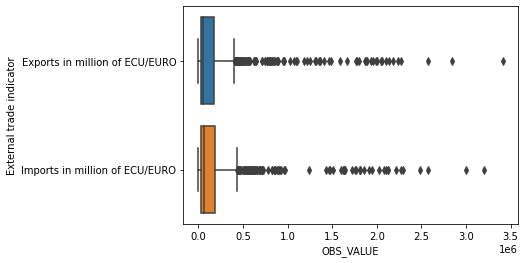


Standard International Trade Classification (SITC Rev. 4, 2006)
AxesSubplot(0.125,0.125;0.775x0.755)


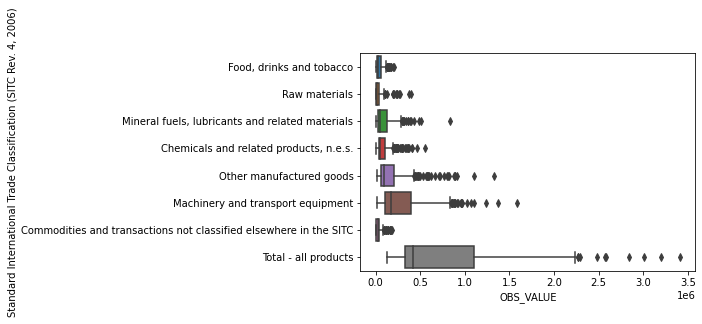


Geopolitical entity (reporting)
AxesSubplot(0.125,0.125;0.775x0.755)


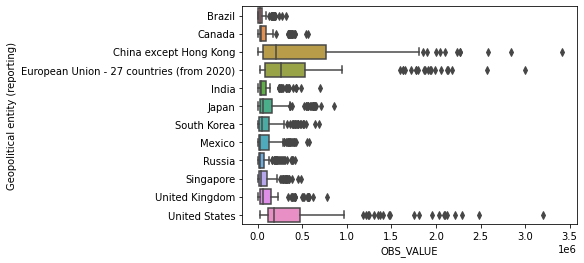


TIME_PERIOD
AxesSubplot(0.125,0.125;0.775x0.755)


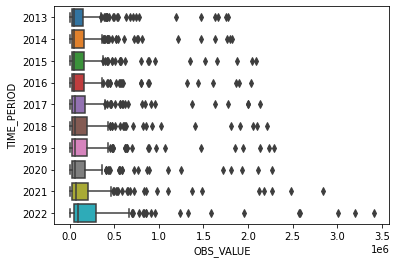

In [16]:
#import seaborn to visualize:
import seaborn as sns
import matplotlib.pyplot as plt

for col in df[quali]:
    print(col)
    print(sns.boxplot(x = df['OBS_VALUE'], y = df[col]))
    plt.show()
    print()

- Analyzing the table without further classification does not yield much insight for us. 
- To gain more insights from the dataset, we must narrow our classification down to the level of:
    - Year
    - Imports or exports
    - Countries
    - Products
- Take a overview at the dataset again:

In [17]:
df.describe(include = ['object', 'string'])

,External trade indicator,"Standard International Trade Classification (SITC Rev. 4, 2006)",Geopolitical entity (reporting),TIME_PERIOD
count,1904,1904,1904,1904
unique,2,8,12,10
top,Exports in million of ECU/EURO,"Food, drinks and tobacco",Brazil,2013
freq,952,238,160,192


--> I want to see how the 2022-EXPORTS values vary among trade classification

In [18]:
exp22 = df[df['External trade indicator']=='Exports in million of ECU/EURO']
exp22 = exp22[exp22['TIME_PERIOD'] == '2022']\
.reset_index() #to reset index
exp22

,index,External trade indicator,"Standard International Trade Classification (SITC Rev. 4, 2006)",Geopolitical entity (reporting),TIME_PERIOD,OBS_VALUE
0,9,Exports in million of ECU/EURO,"Food, drinks and tobacco",Brazil,2022,76323.1
1,19,Exports in million of ECU/EURO,"Food, drinks and tobacco",Canada,2022,53820.7
2,29,Exports in million of ECU/EURO,"Food, drinks and tobacco",China except Hong Kong,2022,72820.3
3,39,Exports in million of ECU/EURO,"Food, drinks and tobacco",European Union - 27 countries (from 2020),2022,204968.8
4,49,Exports in million of ECU/EURO,"Food, drinks and tobacco",India,2022,43994.6
...,...,...,...,...,...,...
83,902,Exports in million of ECU/EURO,Total - all products,South Korea,2022,649146.2
84,912,Exports in million of ECU/EURO,Total - all products,Mexico,2022,549175.3
85,931,Exports in million of ECU/EURO,Total - all products,Singapore,2022,489046.7
86,941,Exports in million of ECU/EURO,Total - all products,United Kingdom,2022,505533.6


In [19]:
#drop the index, geopolitical entity and TIME_PERIOD column:
exp22.drop(columns = ['index','Geopolitical entity (reporting)','TIME_PERIOD','External trade indicator'], axis = 1, inplace = True)
exp22.head()

,"Standard International Trade Classification (SITC Rev. 4, 2006)",OBS_VALUE
0,"Food, drinks and tobacco",76323.1
1,"Food, drinks and tobacco",53820.7
2,"Food, drinks and tobacco",72820.3
3,"Food, drinks and tobacco",204968.8
4,"Food, drinks and tobacco",43994.6


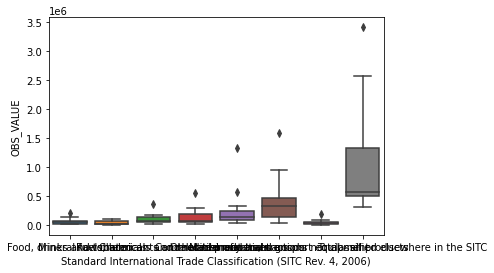

In [20]:
sns.boxplot(x = exp22['Standard International Trade Classification (SITC Rev. 4, 2006)'], 
            y = exp22['OBS_VALUE'])
plt.show()

>`CORRELATION`: QUANTI vs QUANTI

--> In this case, I want to see the correlation between the time period and the trade classification of Brazil exports to EU27.

In [21]:
imports = df[df['External trade indicator'] == 'Imports in million of ECU/EURO']
brazil = imports[imports['Geopolitical entity (reporting)'] == 'Brazil']
#drop columns:
brazil.drop(columns = ['External trade indicator', 'Geopolitical entity (reporting)'], 
            inplace = True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_6756\79855493.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brazil.drop(columns = ['External trade indicator', 'Geopolitical entity (reporting)'],


In [22]:
brazil.reset_index(inplace = True) #reset index
brazil.drop(columns = ['index'], inplace = True) #drop the index column
brazil

C:\Users\Admin\AppData\Local\Temp\ipykernel_6756\3693559145.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brazil.drop(columns = ['index'], inplace = True) #drop the index column


,"Standard International Trade Classification (SITC Rev. 4, 2006)",TIME_PERIOD,OBS_VALUE
0,"Food, drinks and tobacco",2013,8538.1
1,"Food, drinks and tobacco",2014,7979.8
2,"Food, drinks and tobacco",2015,7532.7
3,"Food, drinks and tobacco",2016,8757.7
4,"Food, drinks and tobacco",2017,8180.1
...,...,...,...
75,Total - all products,2018,163285.4
76,Total - all products,2019,172543.1
77,Total - all products,2020,145627.9
78,Total - all products,2021,198436.2


In [23]:
#drop rows that contain Total-all products values:
brazil = brazil[brazil['Standard International Trade Classification (SITC Rev. 4, 2006)'] != 'Total - all products']
brazil

,"Standard International Trade Classification (SITC Rev. 4, 2006)",TIME_PERIOD,OBS_VALUE
0,"Food, drinks and tobacco",2013,8538.1
1,"Food, drinks and tobacco",2014,7979.8
2,"Food, drinks and tobacco",2015,7532.7
3,"Food, drinks and tobacco",2016,8757.7
4,"Food, drinks and tobacco",2017,8180.1
...,...,...,...
65,Commodities and transactions not classified el...,2018,4.6
66,Commodities and transactions not classified el...,2019,11.2
67,Commodities and transactions not classified el...,2020,4.5
68,Commodities and transactions not classified el...,2021,4.1


In [24]:
#construct group_table:
grtab = brazil.groupby(['Standard International Trade Classification (SITC Rev. 4, 2006)',	'TIME_PERIOD'],
                      as_index = False).mean() #or else the grouping variable will be turned into index
grtab

,"Standard International Trade Classification (SITC Rev. 4, 2006)",TIME_PERIOD,OBS_VALUE
0,"Chemicals and related products, n.e.s.",2013,35705.3
1,"Chemicals and related products, n.e.s.",2014,35584.5
2,"Chemicals and related products, n.e.s.",2015,35685.0
3,"Chemicals and related products, n.e.s.",2016,32086.7
4,"Chemicals and related products, n.e.s.",2017,34743.8
...,...,...,...
65,Raw materials,2018,4835.3
66,Raw materials,2019,4786.2
67,Raw materials,2020,4425.2
68,Raw materials,2021,6138.8


In [25]:
#pivot table:
pivot = grtab.pivot(index = 'TIME_PERIOD', columns = 'Standard International Trade Classification (SITC Rev. 4, 2006)')
pivot

OBS_VALUE  \
Standard International Trade Classification (SITC Rev. 4, 2006) Chemicals and related products, n.e.s.   
TIME_PERIOD                                                                                              
2013                                                                                           35705.3   
2014                                                                                           35584.5   
2015                                                                                           35685.0   
2016                                                                                           32086.7   
2017                                                                                           34743.8   
2018                                                                                           38400.9   
2019                                                                                           41301.6   
2020                                                                                           38186.1   
2021                                                                                           54241.3   
2022                                                                                           80617.1   

                                                                                                                                   \
Standard International Trade Classification (SITC Rev. 4, 2006) Commodities and transactions not classified elsewhere in the SITC   
TIME_PERIOD                                                                                                                         
2013                                                                                                           3.2                  
2014                                                                                                           3.3                  
2015                                                                                                           2.8                  
2016                                                                                                           3.2                  
2017                                                                                                           3.6                  
2018                                                                                                           4.6                  
2019                                                                                                          11.2                  
2020                                                                                                           4.5                  
2021                                                                                                           4.1                  
2022                                                                                                         216.9                  

                                                                                          \
Standard International Trade Classification (SITC Rev. 4, 2006) Food, drinks and tobacco   
TIME_PERIOD                                                                                
2013                                                                              8538.1   
2014                                                                              7979.8   
2015                                                                              7532.7   
2016                                                                              8757.7   
2017                                                                              8180.1   
2018                                                                              7740.9   
2019                                                                              8371.9   
2020                                                            

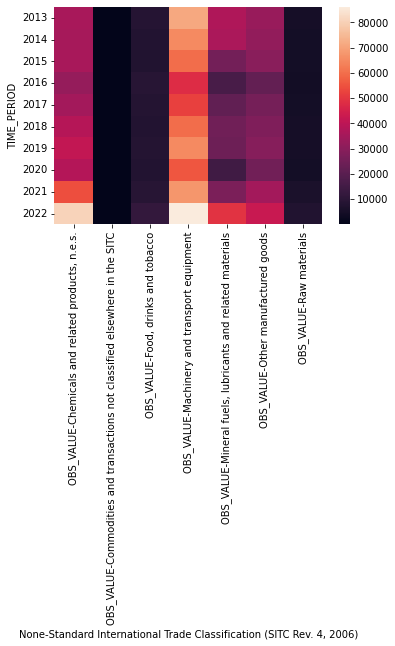

In [27]:
#visualize:
sns.heatmap(data = pivot)
plt.show()

<AxesSubplot:xlabel='TIME_PERIOD', ylabel='None-Standard International Trade Classification (SITC Rev. 4, 2006)'>

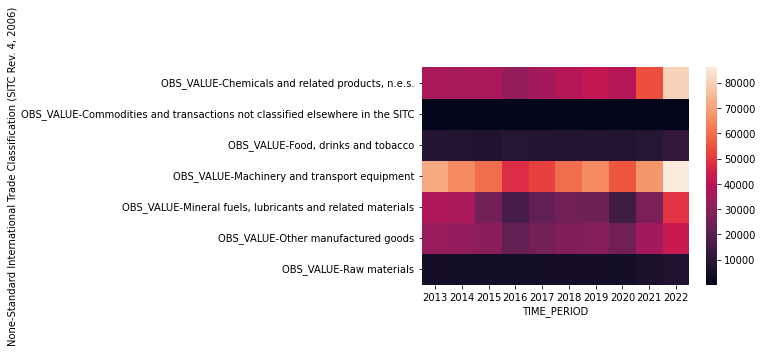

In [28]:
#transpose
transpose = pivot.transpose()
sns.heatmap(transpose)

- Based on the heatmap, we can recognize the following patterns, but not limited to them:
    - The exports from Brazil to EU27 decrease general, apart from Raw_materials and Commodities and transactions not classified elsewhere in the SITC